<a href="https://colab.research.google.com/github/dsklnr/Washington_Real_Estate/blob/Katie_Mears_Branch/FinalDraft_KM14APR2023_Compiled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Group # 5 - Benjamin Ogle, Marvin Moran, and Katie Mears**

# Libraries

In [392]:
# Import the Python libraries and packages 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
from numpy import mean
from numpy import absolute
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#**Part I: Data Importing and Pre-processing:**

In [393]:
#import dataset as dataframe called salesdata using pandas commands
salesdata = pd.read_csv("/content/drive/MyDrive/house_sales.csv")
print(salesdata.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [394]:
# Print the dimensions of the dataset
print("Dimensions:", salesdata.shape)

Dimensions: (21613, 21)


In [395]:
# Print the data types of each column
print("Data types:", salesdata.dtypes)

Data types: id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [396]:
# Print the import method used
print("Import method:", "pd.read_csv(/content/drive/MyDrive/house_sales.csv)")

Import method: pd.read_csv(/content/drive/MyDrive/house_sales.csv)



#**Clean, Wrangle and Handle missing data:** 


In [397]:
# Get info on salesdata dataframe

salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [398]:
# Determine Null Values within salesdata by column  

missing_values = salesdata.isna().sum()
print(missing_values)


id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [399]:
# Total null datapoints 

missing_values.sum().sum()

4356

In [400]:
# Calculate total missing data (%) per column 

percentage = (missing_values / 21613) * 100
rounded_pct = round(percentage, 2)
print(rounded_pct)

id               0.00
date             0.00
price            0.00
bedrooms         5.25
bathrooms        4.94
sqft_living      5.14
sqft_lot         4.83
floors           0.00
waterfront       0.00
view             0.00
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    0.00
yr_built         0.00
yr_renovated     0.00
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
dtype: float64


In [401]:
# Total null datapoints 

num_missing = salesdata.isna().sum().sum()
print(num_missing)

4356


In [402]:
# Calculate total missing data (%) 

percentage = (num_missing / 21613) * 100
rounded_pct = round(percentage, 2)
print(rounded_pct)

20.15


In [403]:
# Drop rows with null data points 
data_clean = salesdata.dropna()
print(data_clean)


               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0   

#Rationale:
A prenormalized correlation matrix was derived and can be found in appendix. Based on the high correlation matrix (shown in appendix) which was set to show only variables with correlations exceeding 0.7, it was determined to include price, bedrooms, bathrooms, sqft_living, sqft_lot, yr_built, and zipcode and exclude all others. Bedrooms showed no high correlation. Price showed strong correlation with sqft_living. Sqft_living showed strong correlation with price, bathrooms, grade, sqft_above, and sqft_living15. With that information it was decided to remove grade, sqft_above, and sqft_living15. Many variables showed no correlation to any of the variables and held no analytical value and where therefore removed. The goal of removing these columns is to make the data set easier to manage and develop a more efficient and accurate analysis.

In [404]:
# Drop the columns "id" and "date" as they're not significant to the analysis and preventing correlation matrix to run 

droppedID = data_clean.drop(["id", "date"], axis=1)

In [405]:
# Removing columns that are to be excluded from analysis, check counts. 

subset = droppedID[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']]
subset.count()

price          17618
bedrooms       17618
bathrooms      17618
sqft_living    17618
sqft_lot       17618
yr_built       17618
zipcode        17618
dtype: int64

# **Aggregation - Descriptive Stats**

In [406]:
# To perform aggregation, a descriptive statistics table was derived for the 7 remaining variables. - Based on non - normalized data 

stats_table = subset.describe().round(2)
print(stats_table)

            price  bedrooms  bathrooms  sqft_living    sqft_lot  yr_built  \
count    17618.00  17618.00   17618.00     17618.00    17618.00  17618.00   
mean    541643.73      3.38       2.11      2083.48    15140.85   1970.82   
std     368718.59      0.94       0.77       918.74    42288.64     29.37   
min      75000.00      0.00       0.00       370.00      520.00   1900.00   
25%     323425.00      3.00       1.75      1430.00     5050.00   1951.00   
50%     450000.00      3.00       2.25      1920.00     7620.00   1974.00   
75%     646000.00      4.00       2.50      2550.00    10659.75   1997.00   
max    7700000.00     33.00       8.00     12050.00  1651359.00   2015.00   

        zipcode  
count  17618.00  
mean   98078.22  
std       53.50  
min    98001.00  
25%    98033.00  
50%    98065.00  
75%    98118.00  
max    98199.00  


Plot a histogram of subset data

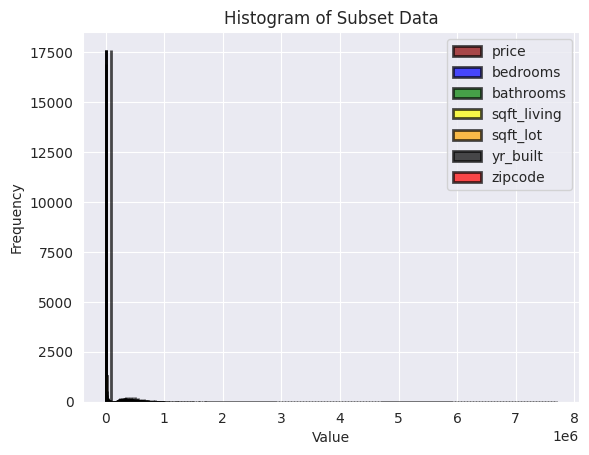

In [407]:
# set the color scheme
colors = ['darkred', 'blue', 'green', 'yellow', 'orange', 'black', 'red']

# create the histogram with bold colors
plt.hist(subset, bins='auto', color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# add a legend to the plot
labels = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']
plt.legend(labels)

# set the title and axis labels
plt.title('Histogram of Subset Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# display the plot
plt.show()

In [409]:
# calculate skewness and kurtosis on subset dataset 

skewness = stats.skew(subset)
kurtosis = stats.kurtosis(subset)

print('Skewness:', skewness)
print('Kurtosis:', kurtosis)

Skewness: [ 3.91567912  2.24532921  0.49082424  1.40674007 13.43913522 -0.4557788
  0.39856634]
Kurtosis: [ 32.26342185  57.91595134   1.08889853   4.21162362 297.12615005
  -0.67278653  -0.86042756]


#**Normalization**
Normalization is the process of scaling numeric data to a common range. It is a common preprocessing step in machine learning to improve the performance of models that use distance-based measures. There were two methods of normalization scaling that were evaluated for this analysis. It was determined that the MinMaxScaler yielded better results for this dataset. 



## *Normalization via MinMaxScaler*

In [410]:
# save the minmaxnormalized_data dataframe as a CSV file

minmaxnormalized_data.to_csv('minmaxnormalized_data.csv', index=True)

In [411]:
# Create a MinMaxScaler object based on Min Max Scaling 
scaler = MinMaxScaler()
minmaxnormalized_data = scaler.fit_transform(subset)
print(minmaxnormalized_data)

[[1.92655738e-02 9.09090909e-02 1.25000000e-01 ... 3.10751079e-03
  4.78260870e-01 8.93939394e-01]
 [6.07213115e-02 9.09090909e-02 2.81250000e-01 ... 4.07186891e-03
  4.43478261e-01 6.26262626e-01]
 [1.37704918e-02 6.06060606e-02 1.25000000e-01 ... 5.74253455e-03
  2.86956522e-01 1.36363636e-01]
 ...
 [4.28984918e-02 6.06060606e-02 9.37500000e-02 ... 5.02774650e-04
  9.47826087e-01 7.22222222e-01]
 [4.26229508e-02 9.09090909e-02 3.12500000e-01 ... 1.13154584e-03
  9.04347826e-01 1.31313131e-01]
 [3.27868852e-02 6.06060606e-02 9.37500000e-02 ... 3.36798440e-04
  9.39130435e-01 7.22222222e-01]]


In [412]:
# create the scaler object
scaler = MinMaxScaler()

# fit and transform the subset of data
scaled_data = scaler.fit_transform(subset)

# create a new DataFrame with the scaled data and column names
minmaxnormalized_data = pd.DataFrame(scaled_data, columns=subset.columns)

# print the new DataFrame
print(minmaxnormalized_data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built  \
0      0.019266  0.090909    0.12500     0.069349  0.003108  0.478261   
1      0.060721  0.090909    0.28125     0.188356  0.004072  0.443478   
2      0.013770  0.060606    0.12500     0.034247  0.005743  0.286957   
3      0.069377  0.121212    0.37500     0.136130  0.002714  0.565217   
4      0.057049  0.090909    0.25000     0.112158  0.004579  0.756522   
...         ...       ...        ...          ...       ...       ...   
17613  0.037377  0.090909    0.31250     0.099315  0.000370  0.947826   
17614  0.042623  0.121212    0.31250     0.166096  0.003206  0.991304   
17615  0.042898  0.060606    0.09375     0.055651  0.000503  0.947826   
17616  0.042623  0.090909    0.31250     0.105308  0.001132  0.904348   
17617  0.032787  0.060606    0.09375     0.055651  0.000337  0.939130   

        zipcode  
0      0.893939  
1      0.626263  
2      0.136364  
3      0.681818  
4      0.368687  
...         ...

Histogram of Normalized Data 

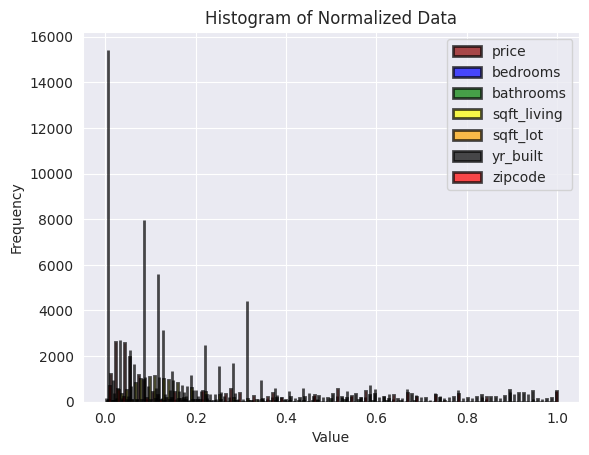

In [413]:
# set the color scheme
colors = ['darkred', 'blue', 'green', 'yellow', 'orange', 'black', 'red']

# create the histogram with bold colors
plt.hist(minmaxnormalized_data, bins='auto', color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# add a legend to the plot
labels = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']
plt.legend(labels)

# set the title and axis labels
plt.title('Histogram of Normalized Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# display the plot
plt.show()

Boxplot of Normalized data 

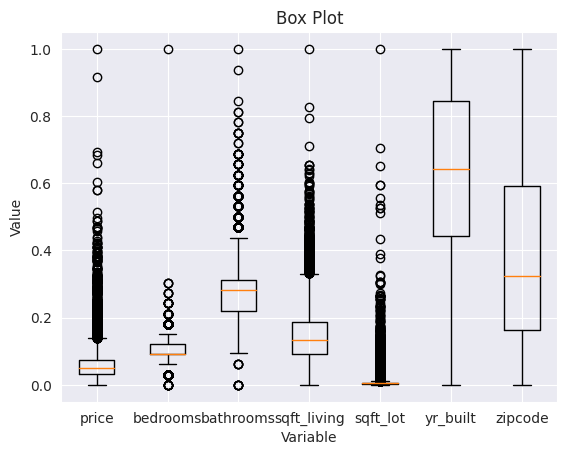

In [414]:
# Create a box plot of MinMax Normalized Data

fig, ax = plt.subplots()
ax.boxplot(minmaxnormalized_data, labels=minmaxnormalized_data.columns)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')
plt.show()

# *Rationale:*
It was observed that normalizing the dataset had an impact on how the charts ran but did not have any impact on correlation values and/or skewness and kurtosis. 

It was determined that there were no feature construction techniques needed to be applied to this data set. 
It was also determined that there was no need for discretization to be performed as there was no need to convert
continuous variables into categorical variables in this analysis. 


# **Correlation Matrix with Normalized Data**

In [415]:
# Correlation Matrix with Normalized Data (MinMaxScale)

corr_matrix_norm = minmaxnormalized_data.corr()
print("Correlation matrix:")
print(corr_matrix_norm)

Correlation matrix:
                price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built  \
price        1.000000  0.308095   0.528322     0.705356  0.088484  0.054736   
bedrooms     0.308095  1.000000   0.514256     0.573338  0.030226  0.157933   
bathrooms    0.528322  0.514256   1.000000     0.755995  0.084713  0.506600   
sqft_living  0.705356  0.573338   0.755995     1.000000  0.165686  0.320739   
sqft_lot     0.088484  0.030226   0.084713     0.165686  1.000000  0.052603   
yr_built     0.054736  0.157933   0.506600     0.320739  0.052603  1.000000   
zipcode     -0.052410 -0.154867  -0.208276    -0.199072 -0.128649 -0.353900   

              zipcode  
price       -0.052410  
bedrooms    -0.154867  
bathrooms   -0.208276  
sqft_living -0.199072  
sqft_lot    -0.128649  
yr_built    -0.353900  
zipcode      1.000000  


In [416]:
# Filter the correlation matrix to show only values greater than 0.7 (Normalized Data - MinMax)
high_corr_norm = corr_matrix_norm[abs(corr_matrix_norm) > 0.7]

# Print the columns with high correlation (Normalized Data - MinMax)
print(high_corr_norm.dropna(how='all', axis=1).dropna(how='all', axis=0))

                price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built  \
price        1.000000       NaN        NaN     0.705356       NaN       NaN   
bedrooms          NaN       1.0        NaN          NaN       NaN       NaN   
bathrooms         NaN       NaN   1.000000     0.755995       NaN       NaN   
sqft_living  0.705356       NaN   0.755995     1.000000       NaN       NaN   
sqft_lot          NaN       NaN        NaN          NaN       1.0       NaN   
yr_built          NaN       NaN        NaN          NaN       NaN       1.0   
zipcode           NaN       NaN        NaN          NaN       NaN       NaN   

             zipcode  
price            NaN  
bedrooms         NaN  
bathrooms        NaN  
sqft_living      NaN  
sqft_lot         NaN  
yr_built         NaN  
zipcode          1.0  


#**Part II: Data Analysis and Visualization** 

**Identify categorical, ordinal, and numerical variables within full dataset**


In [417]:
# create matrix table with variable types

# Define the variable names and their classifications
variables = {
    'id': 'Categorical',
    'date': 'Ordinal',
    'price': 'Numerical, Continuous',
    'bedrooms': 'Numerical, Discrete',
    'bathrooms': 'Numerical, Discrete',
    'sqft_living': 'Numerical, Continuous',
    'sqft_lot': 'Numerical, Continuous',
    'floors': 'Numerical, Discrete',
    'waterfront': 'Categorical',
    'view': 'Categorical',
    'condition': 'Ordinal',
    'grade': 'Ordinal',
    'sqft_basement': 'Numerical, Continuous',
    'yr_built': 'Ordinal',
    'yr_renovated': 'Ordinal',
    'zipcode': 'Categorical',
    'lat': 'Numerical, Continuous',
    'long': 'Numerical, Continuous'
}

# Create the DataFrame
variable_types = pd.DataFrame(list(variables.items()), columns=['Variable', 'Type'])

# Display the matrix table using tabulate
print(tabulate(variable_types, headers='keys', tablefmt='github'))


|    | Variable      | Type                  |
|----|---------------|-----------------------|
|  0 | id            | Categorical           |
|  1 | date          | Ordinal               |
|  2 | price         | Numerical, Continuous |
|  3 | bedrooms      | Numerical, Discrete   |
|  4 | bathrooms     | Numerical, Discrete   |
|  5 | sqft_living   | Numerical, Continuous |
|  6 | sqft_lot      | Numerical, Continuous |
|  7 | floors        | Numerical, Discrete   |
|  8 | waterfront    | Categorical           |
|  9 | view          | Categorical           |
| 10 | condition     | Ordinal               |
| 11 | grade         | Ordinal               |
| 12 | sqft_basement | Numerical, Continuous |
| 13 | yr_built      | Ordinal               |
| 14 | yr_renovated  | Ordinal               |
| 15 | zipcode       | Categorical           |
| 16 | lat           | Numerical, Continuous |
| 17 | long          | Numerical, Continuous |


**Identify measurements of centrality**

In [418]:

# identify measurements of centrality for (numeric) variables

# define target columns
target_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']
target_dat = subset[target_cols]

# calculate centrality
mean_vals = round(target_dat.mean(), 2)
median_vals = round(target_dat.median(),2)
mode_vals = round(target_dat.mode().iloc[0], 2)

# combine results into df and print
central_calc = pd.DataFrame({'Mean': mean_vals, 'Median': median_vals, 'Mode': mode_vals})
print(tabulate(central_calc, headers='keys', tablefmt='github'))

|             |      Mean |    Median |     Mode |
|-------------|-----------|-----------|----------|
| price       | 541644    | 450000    | 450000   |
| bedrooms    |      3.38 |      3    |      3   |
| bathrooms   |      2.11 |      2.25 |      2.5 |
| sqft_living |   2083.48 |   1920    |   1300   |
| sqft_lot    |  15140.9  |   7620    |   5000   |
| yr_built    |   1970.82 |   1974    |   2014   |
| zipcode     |  98078.2  |  98065    |  98103   |


# **Data Visualization** 

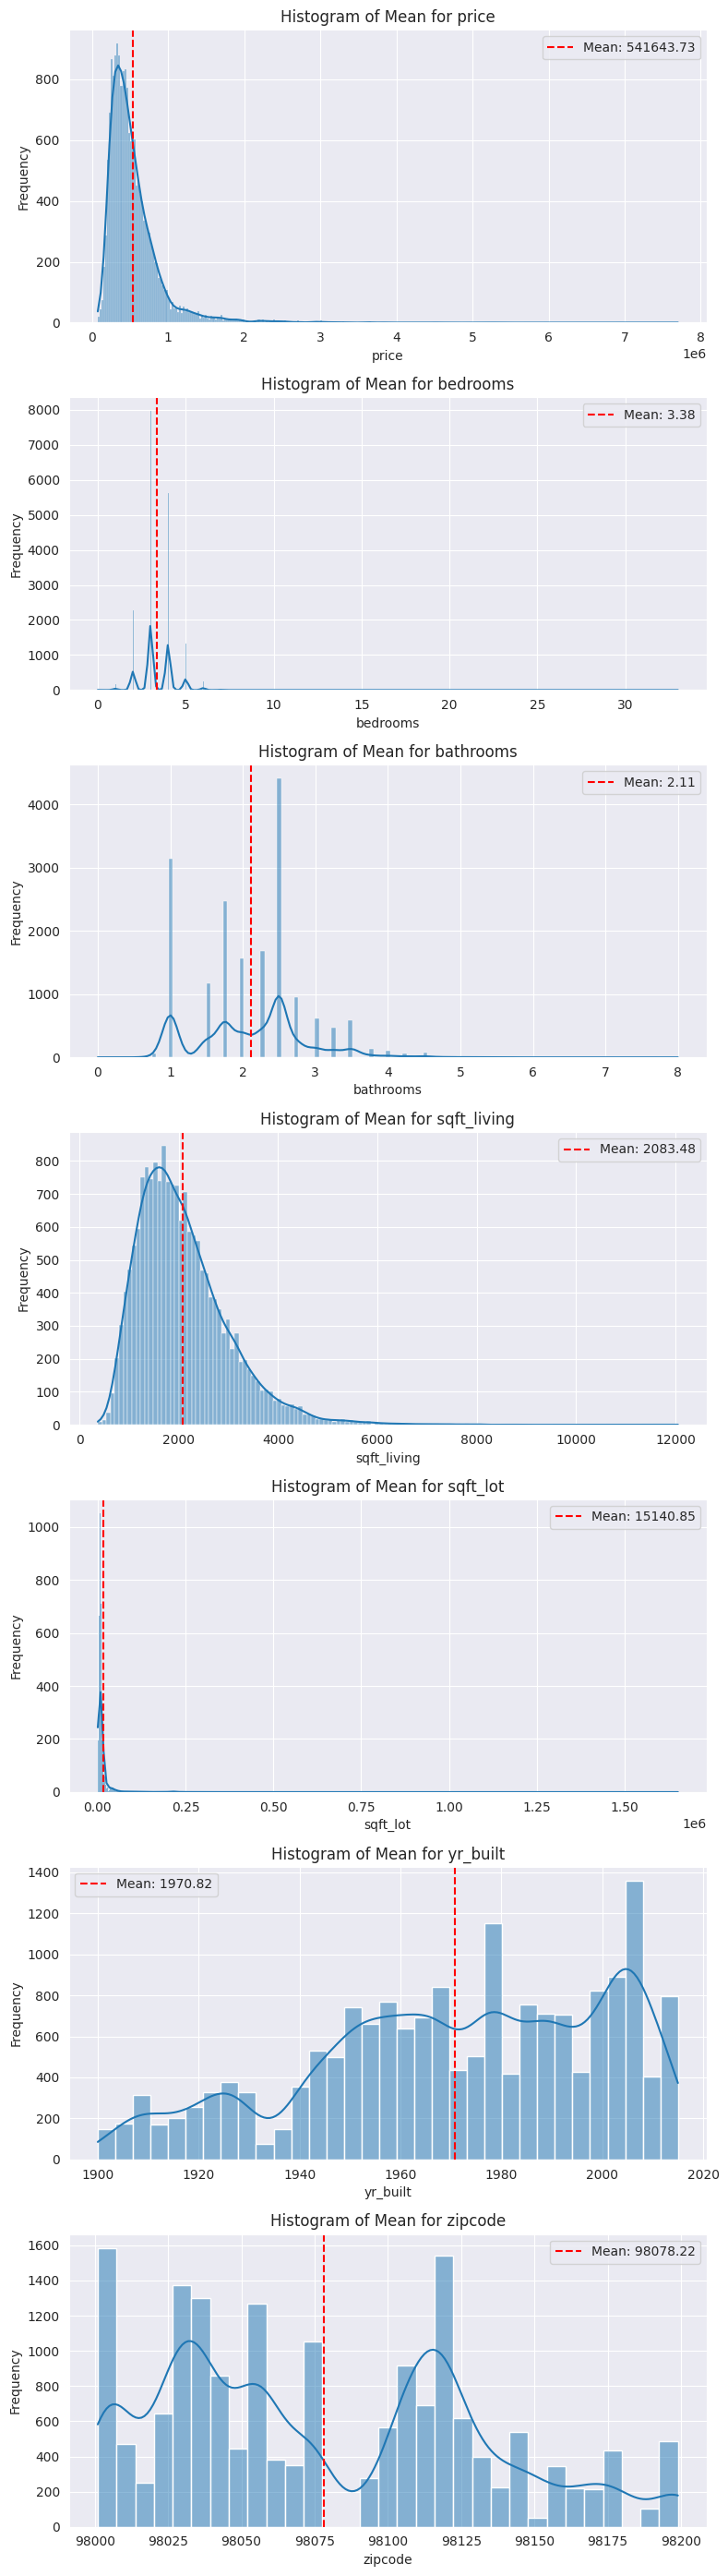

In [419]:
# create visual for MEAN values of (numeric) variables

# select columns
cols_to_plot_mean = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']

# calculate mean values for each column
mean_values = subset[target_cols].mean()

# Set up the figure and subplots
n_plots = len(cols_to_plot_mean)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))

for i, column in enumerate(cols_to_plot_mean):
    # Select the data for the current column
    data = subset[column]

    # Get the mean value for the current column
    mean_value = mean_values[column]

    # Create a histogram with a density curve using seaborn
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=axes[i])

    # Add a vertical line for the mean
    axes[i].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

    # Add legend and labels
    axes[i].legend()
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Mean for {column}')

# Show the plots
plt.tight_layout()
plt.show()

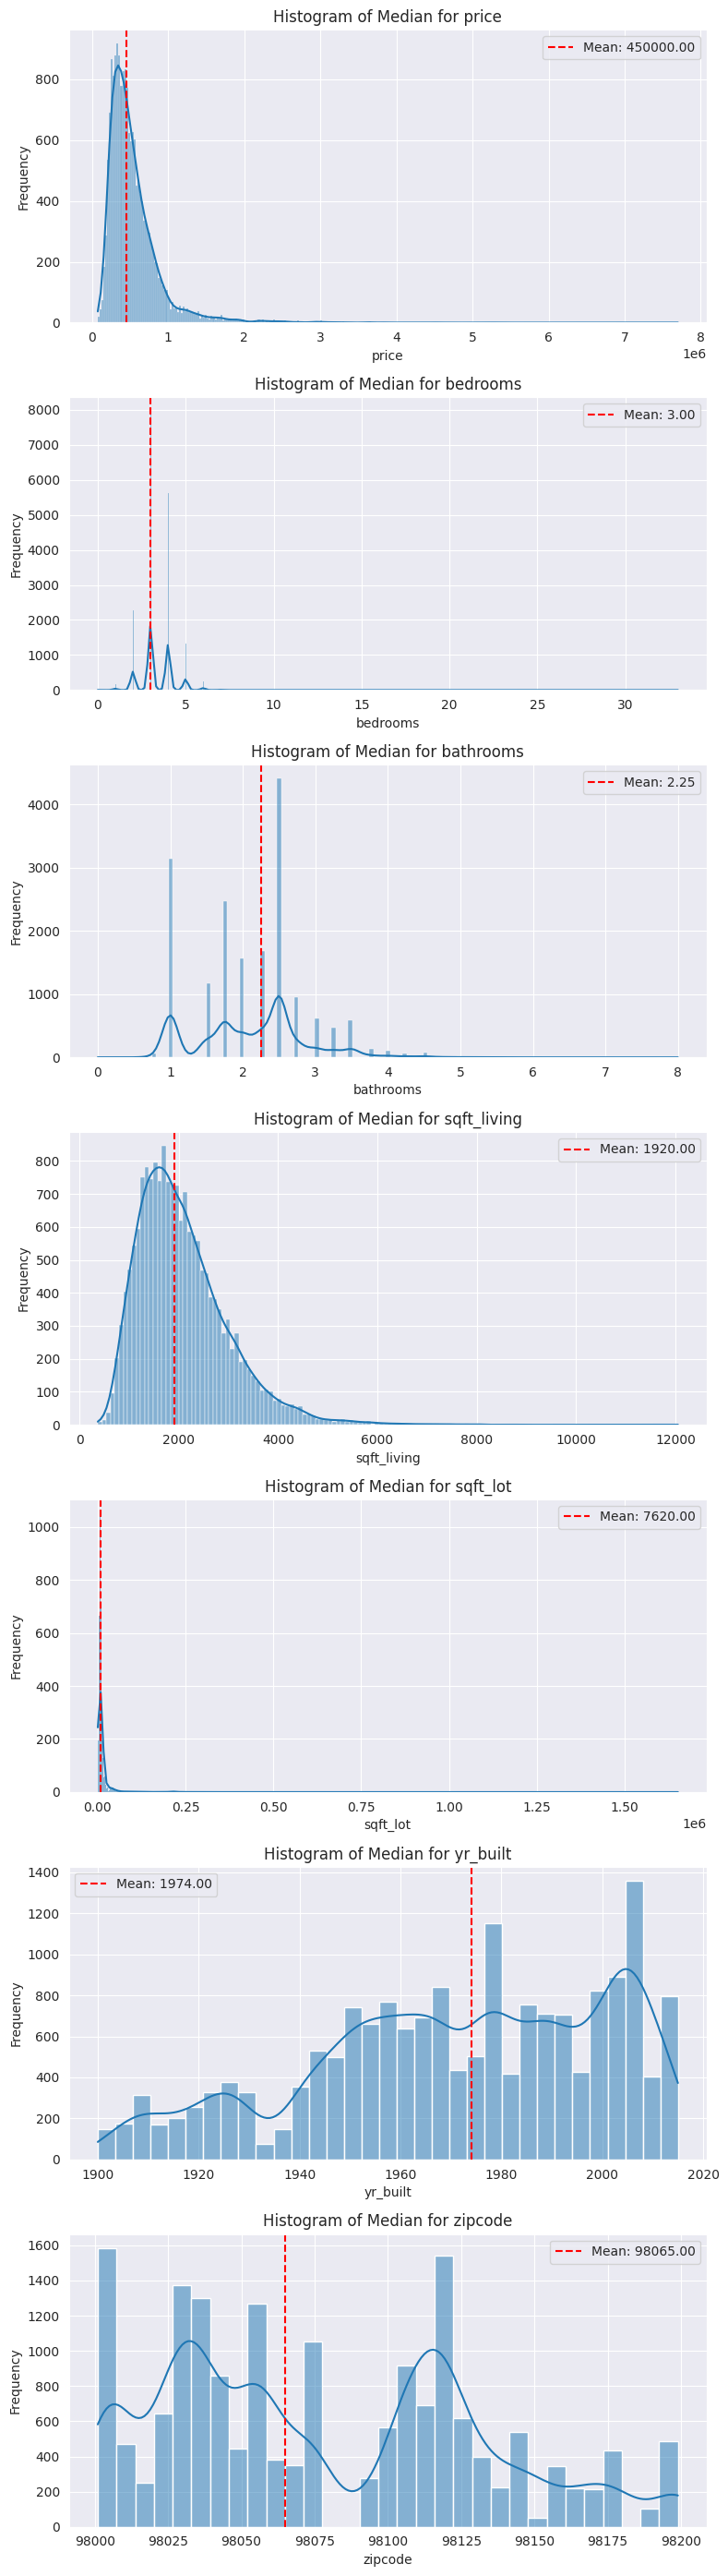

In [420]:
# create visual for MEDIAN values of (numeric) variables

# select columns
cols_to_plot_median = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']

# calculate median values for each column
median_values = subset[target_cols].median()

# Set up the figure and subplots
n_plots = len(cols_to_plot_median)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))

for i, column in enumerate(cols_to_plot_median):
    # Select the data for the current column
    data = subset[column]

    # Get the median value for the current column
    median_value = median_values[column]

    # Create a histogram with a density curve using seaborn
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=axes[i])

    # Add a vertical line for the median
    axes[i].axvline(median_value, color='r', linestyle='--', label=f'Mean: {median_value:.2f}')

    # Add legend and labels
    axes[i].legend()
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Median for {column}')

# Show the plots
plt.tight_layout()
plt.show()

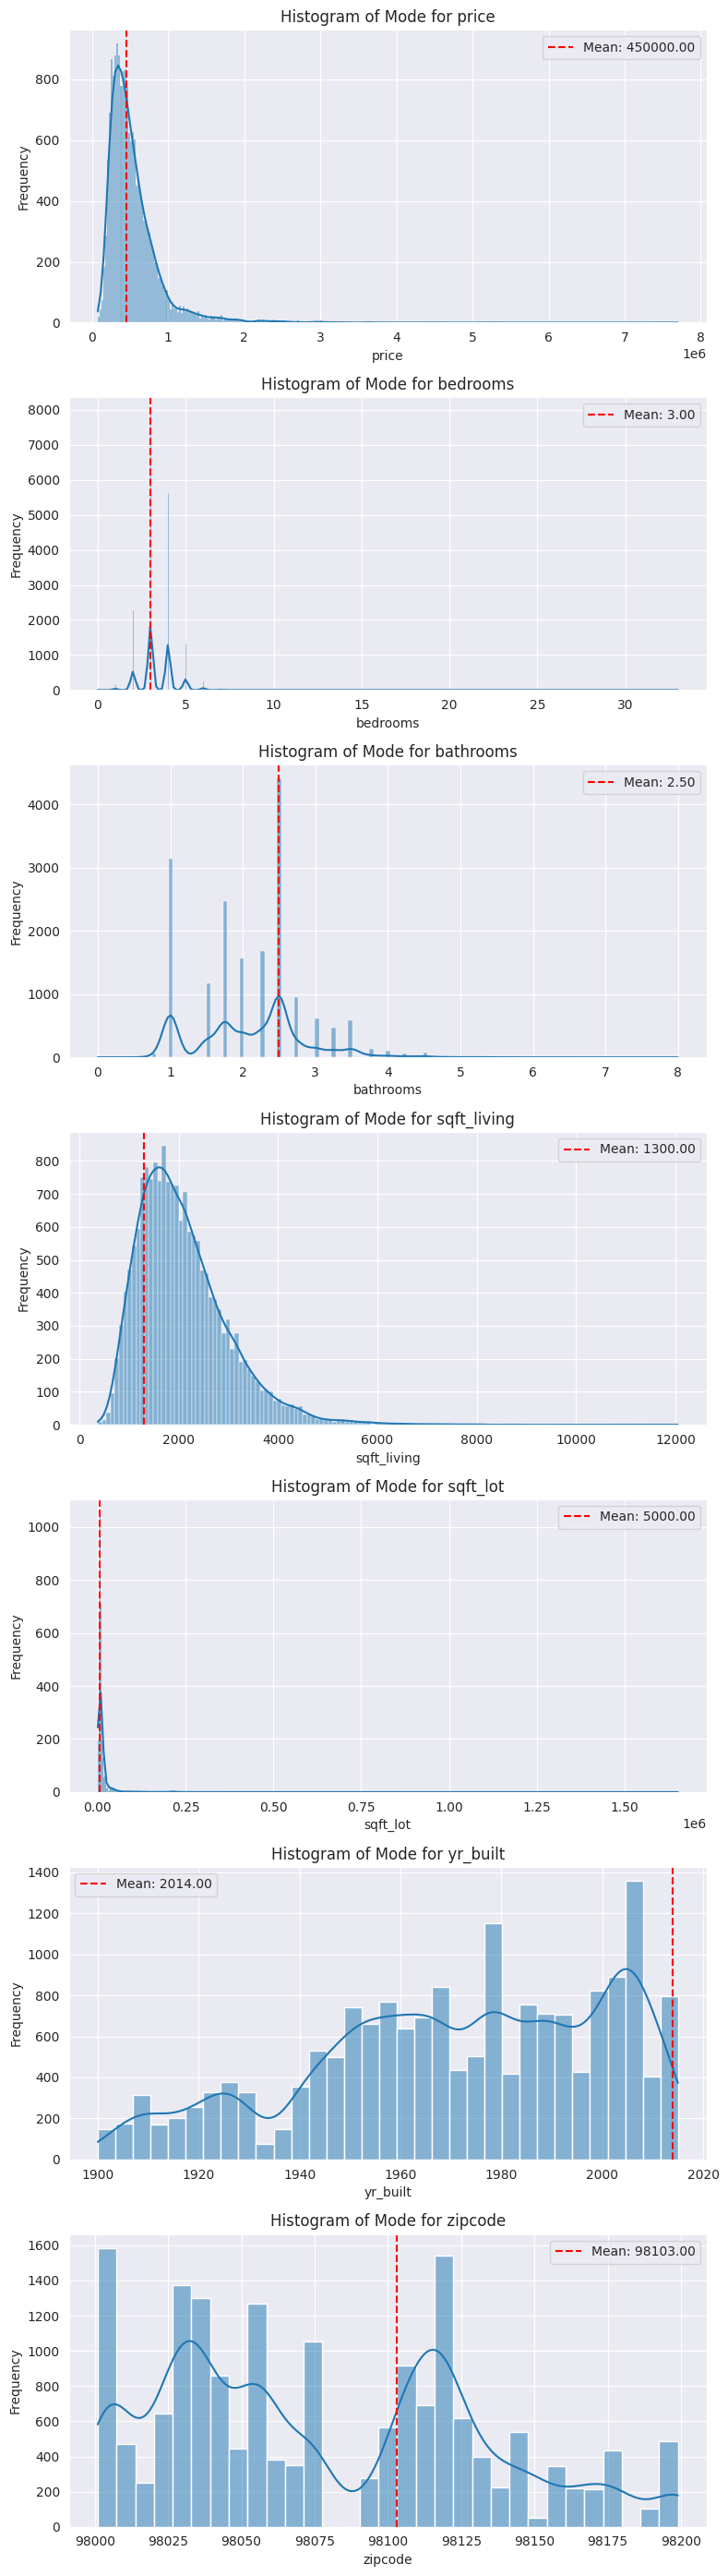

In [421]:
# create visual for MODE values of (numeric) variables

# select columns
cols_to_plot_mode = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']

# calculate mode values for each column
mode_values = subset[target_cols].mode().iloc[0]

# Set up the figure and subplots
n_plots = len(cols_to_plot_mode)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))

for i, column in enumerate(cols_to_plot_mode):
    # Select the data for the current column
    data = subset[column]

    # Get the mode value for the current column
    mode_value = mode_values[column]

    # Create a histogram with a density curve using seaborn
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=axes[i])

    # Add a vertical line for the mode
    axes[i].axvline(mode_value, color='r', linestyle='--', label=f'Mean: {mode_value:.2f}')

    # Add legend and labels
    axes[i].legend()
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Mode for {column}')

# Show the plots
plt.tight_layout()
plt.show()

# *Identify measurements of distribution*

In [422]:
# identify measurements of distribution for (numeric) variables

# define target columns
target_cols2 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']

# create empty data frame to store the results
results_df = pd.DataFrame(columns=['Range', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'])

# Loop through the columns and calculate the measures of distribution
for column_name in target_cols2:
    data_range = round(subset[column_name].max() - subset[column_name].min(), 2)
    data_variance = round(subset[column_name].var(), 2)
    data_std_dev = round(subset[column_name].std(), 2)
    data_skewness = round(subset[column_name].skew(), 2)
    data_kurtosis = round(subset[column_name].kurt(), 2)
    
    # Store the results in the DataFrame
    results_df.loc[column_name] = [data_range, data_variance, data_std_dev, data_skewness, data_kurtosis]

# Print the results
print(tabulate(results_df, headers='keys', tablefmt='github'))

|             |           Range |         Variance |   Standard Deviation |   Skewness |   Kurtosis |
|-------------|-----------------|------------------|----------------------|------------|------------|
| price       |     7.625e+06   |      1.35953e+11 |            368719    |       3.92 |      32.27 |
| bedrooms    |    33           |      0.88        |                 0.94 |       2.25 |      57.93 |
| bathrooms   |     8           |      0.59        |                 0.77 |       0.49 |       1.09 |
| sqft_living | 11680           | 844077           |               918.74 |       1.41 |       4.21 |
| sqft_lot    |     1.65084e+06 |      1.78833e+09 |             42288.6  |      13.44 |     297.21 |
| yr_built    |   115           |    862.33        |                29.37 |      -0.46 |      -0.67 |
| zipcode     |   198           |   2862.43        |                53.5  |       0.4  |      -0.86 |


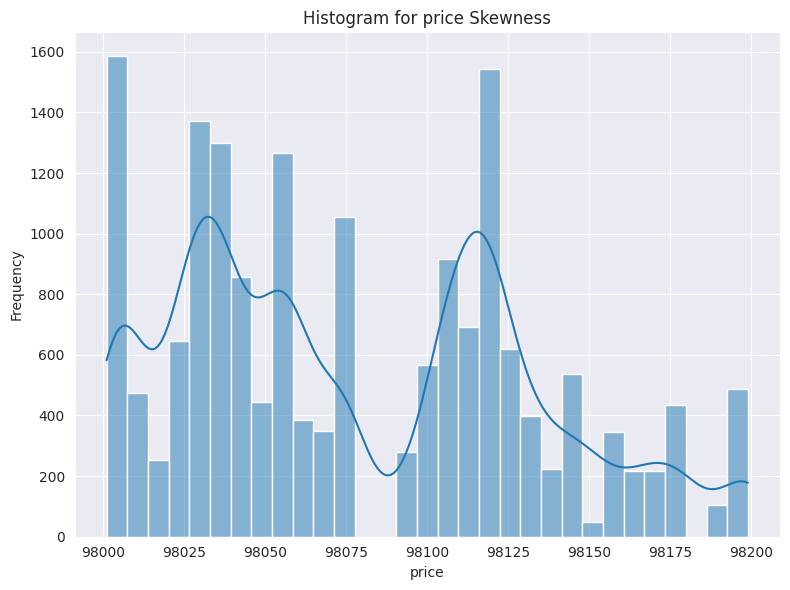

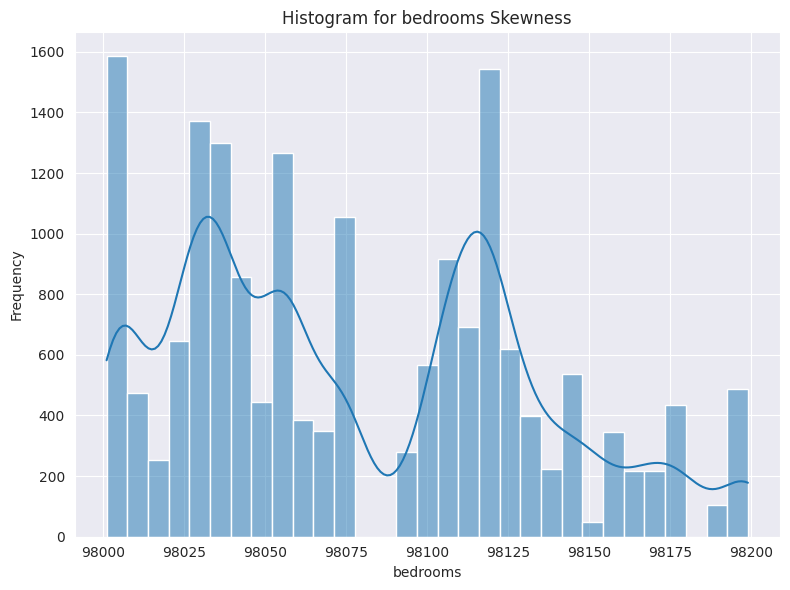

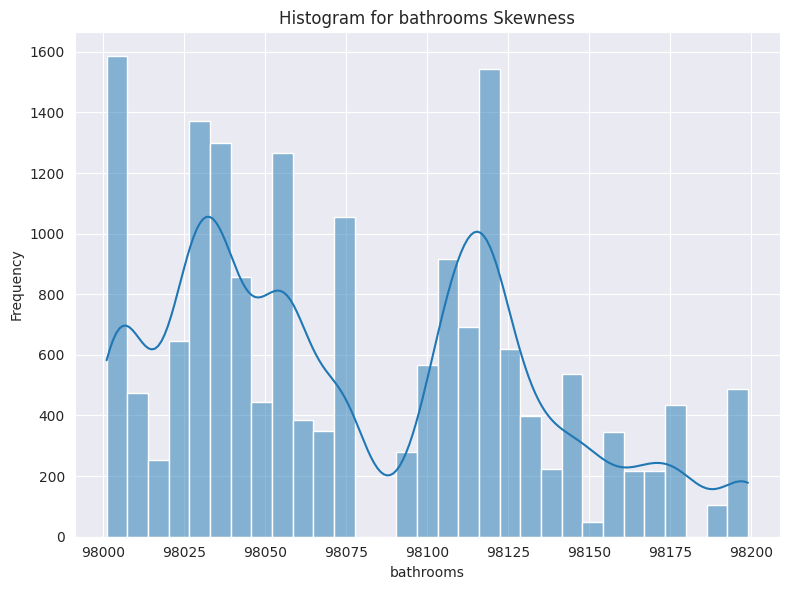

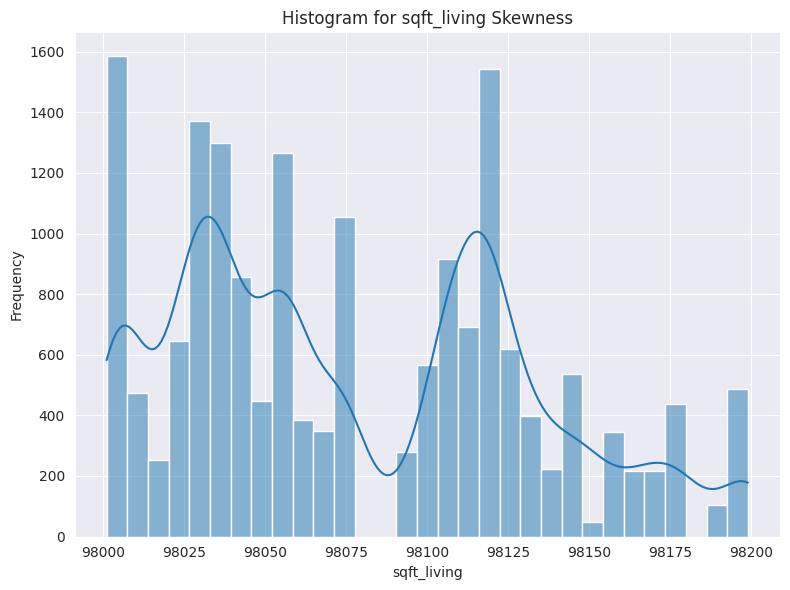

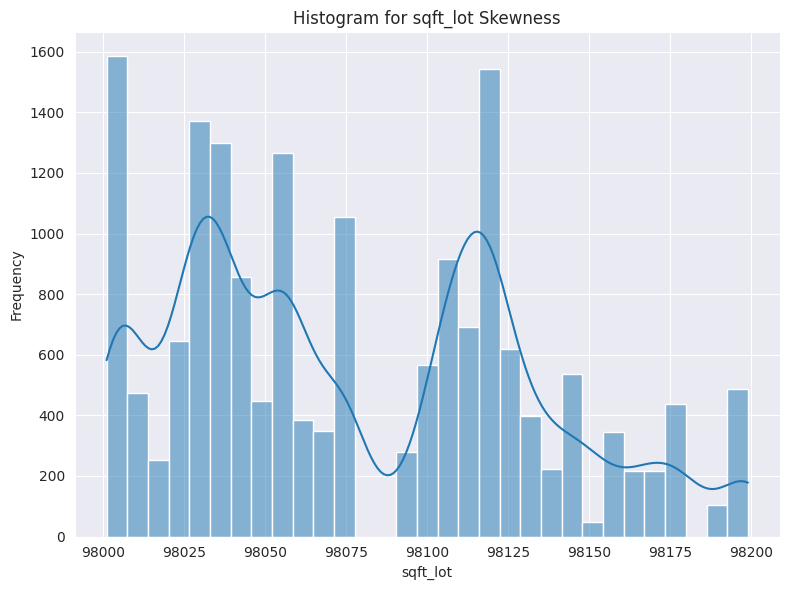

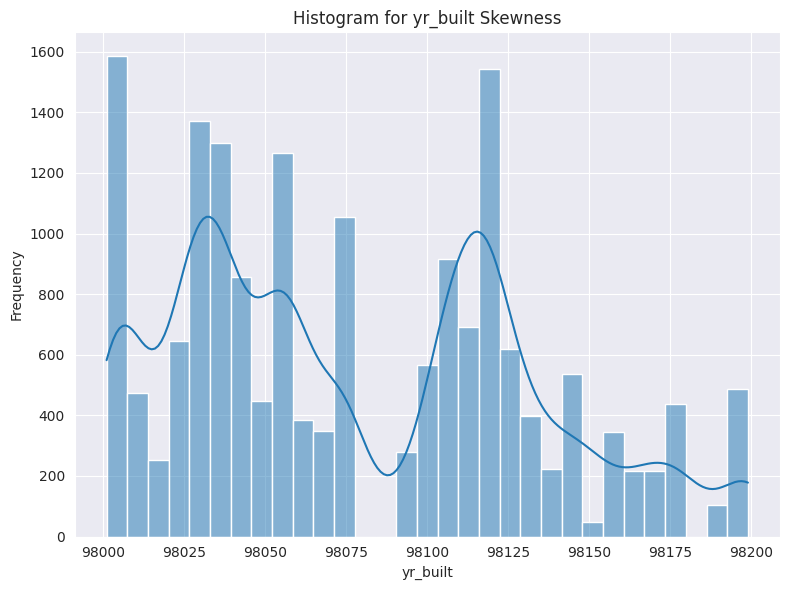

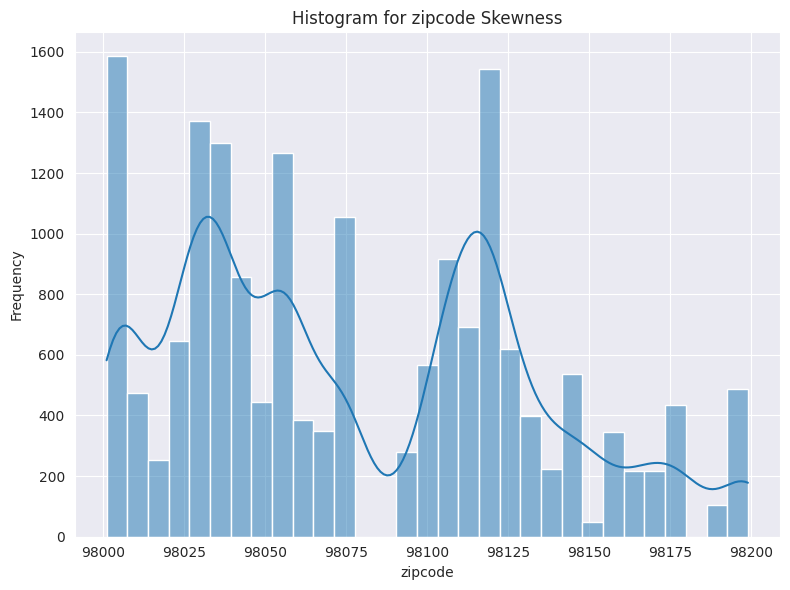

In [423]:
# create visual for skewness of (numeric) variables

# define target columns
target_cols2 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']

# create empty data frame to store the skewness values
skewness_df = pd.DataFrame(columns=['Skewness'])

# loop through the columns and calculate the skewness
for column_name in target_cols2:
    data_skewness = subset[column_name].skew()
    skewness_df.loc[column_name] = [data_skewness]

    # set up the figure and subplot
    fig, ax = plt.subplots(figsize=(8, 6))

    # create a histogram
    sns.histplot(data, kde=True, bins='auto', alpha=0.5, ax=ax)

    # Add labels and title
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram for {column_name} Skewness')

    # Show the plot
    plt.tight_layout()
    plt.show()

**Correlation and Dependent v. Independent Variables**

In [424]:
# create a Pearson correlation table

# calculate correlation coeffificients and place in matrix table
corr_matrix = subset.corr()
print(tabulate(corr_matrix, headers='keys', tablefmt='github'))

|             |      price |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   yr_built |    zipcode |
|-------------|------------|------------|-------------|---------------|------------|------------|------------|
| price       |  1         |  0.308095  |   0.528322  |      0.705356 |  0.0884842 |  0.0547358 | -0.0524103 |
| bedrooms    |  0.308095  |  1         |   0.514256  |      0.573338 |  0.0302257 |  0.157933  | -0.154867  |
| bathrooms   |  0.528322  |  0.514256  |   1         |      0.755995 |  0.0847133 |  0.5066    | -0.208276  |
| sqft_living |  0.705356  |  0.573338  |   0.755995  |      1        |  0.165686  |  0.320739  | -0.199072  |
| sqft_lot    |  0.0884842 |  0.0302257 |   0.0847133 |      0.165686 |  1         |  0.0526028 | -0.128649  |
| yr_built    |  0.0547358 |  0.157933  |   0.5066    |      0.320739 |  0.0526028 |  1         | -0.3539    |
| zipcode     | -0.0524103 | -0.154867  |  -0.208276  |     -0.199072 | -0.128649  | -0.3539    |  1         |


In [425]:
# create a Pearson correlation table - Normalized Data

# calculate correlation coeffificients and place in matrix table
corr_matrix_Norm = minmaxnormalized_data.corr()
print(tabulate(corr_matrix_Norm, headers='keys', tablefmt='github'))

|             |      price |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   yr_built |    zipcode |
|-------------|------------|------------|-------------|---------------|------------|------------|------------|
| price       |  1         |  0.308095  |   0.528322  |      0.705356 |  0.0884842 |  0.0547358 | -0.0524103 |
| bedrooms    |  0.308095  |  1         |   0.514256  |      0.573338 |  0.0302257 |  0.157933  | -0.154867  |
| bathrooms   |  0.528322  |  0.514256  |   1         |      0.755995 |  0.0847133 |  0.5066    | -0.208276  |
| sqft_living |  0.705356  |  0.573338  |   0.755995  |      1        |  0.165686  |  0.320739  | -0.199072  |
| sqft_lot    |  0.0884842 |  0.0302257 |   0.0847133 |      0.165686 |  1         |  0.0526028 | -0.128649  |
| yr_built    |  0.0547358 |  0.157933  |   0.5066    |      0.320739 |  0.0526028 |  1         | -0.3539    |
| zipcode     | -0.0524103 | -0.154867  |  -0.208276  |     -0.199072 | -0.128649  | -0.3539    |  1         |


Note: There is no difference in the correlation matrix when the normalized data is assessed. 

In [426]:
# identify significant variables (defined by >= 70%)

# variables with correlation values greater than 0.7 (excluding the diagonal)
high_corr = corr_matrix.where((abs(corr_matrix) > 0.7) & (corr_matrix != 1)).stack()

# convert results to a data frame
high_corr_df = pd.DataFrame(high_corr).reset_index()
high_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# # sort data frame by the Correlation column only in descending order
# high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

# # print results
# print(tabulate(high_corr_df, headers='keys', tablefmt='psql', showindex=False))

# sory the data frame by 'Variable 1' and 'Correlation' columns in descending order
sorted_high_corr_df = high_corr_df.sort_values(by=['Variable 1', 'Correlation'], ascending=[True, False])

# print results
print(tabulate(sorted_high_corr_df, headers='keys', tablefmt='psql', showindex=False))

+--------------+--------------+---------------+
| Variable 1   | Variable 2   |   Correlation |
|--------------+--------------+---------------|
| bathrooms    | sqft_living  |      0.755995 |
| price        | sqft_living  |      0.705356 |
| sqft_living  | bathrooms    |      0.755995 |
| sqft_living  | price        |      0.705356 |
+--------------+--------------+---------------+



# For this study, the dependent variable is the 'price' variable.
The independent variables are those that have a correlation value (+- 0.700000) with 'price' = sqft-living and bathrooms.

# *Part III: Data Analytics*

Create an OLS regression model before removing outliers from subset dataset  based on independent variables bathrooms and sqft_living  (including outliers)

In [427]:
# Define the dependent variable (y) and independent variables (X)  based on subset data with bathrooms and sqft_living as independent variables. 
y = subset[['price']]
x = subset[['bathrooms', 'sqft_living']]

# Add a constant to the independent variables
X = sm.add_constant(x)

# Create the OLS regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     8723.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:38:00   Log-Likelihood:            -2.4476e+05
No. Observations:               17618   AIC:                         4.895e+05
Df Residuals:                   17615   BIC:                         4.895e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.377e+04   5789.622     -7.559      

Create an OLS regression model before removing outliers from minmaxnormalized_data based on independent variables bathrooms and sqft_living  (including outliers)

In [428]:
# Load the dataset
df = pd.read_csv('minmaxnormalized_data.csv')

# Define the dependent variable (y) and independent variables (X)
y = df['price']
X = df[['bathrooms', 'sqft_living']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create the OLS regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     8723.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:38:01   Log-Likelihood:                -18935.
No. Observations:               17618   AIC:                         3.788e+04
Df Residuals:                   17615   BIC:                         3.790e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.601e-16      0.005      3e-14      

# *Removing Outliers*

In [429]:
# Create a function thata removes outliers from a column
def rm_outliers_mean(column):
  col_data = subset[[column]]

  mean = col_data.mean()
  quartile1 = col_data.quantile(0.25)
  quartile3 = col_data.quantile(0.75)
  iqr = quartile3 - quartile1

  low_outliers = quartile1 - 1.5 * iqr
  high_outliers = quartile3 + 1.5 * iqr

  outliers_df = df[~((col_data < low_outliers) | (col_data > high_outliers))]
  mean_outliers_removed = outliers_df[[column]].count()
  return mean, mean_outliers_removed

# Removing outliers from columns

In [430]:
# Remove outliers from columns and calculate the mean
clean_price = rm_outliers_mean('price')
clean_sqft_living = rm_outliers_mean('sqft_living')
clean_sqft_lot = rm_outliers_mean('sqft_lot')
print('Price:', clean_price, '\n\nSqft Living:', clean_sqft_living, '\n\nSqft Lot:',
      clean_sqft_lot)

Price: (price    541643.730787
dtype: float64, price    13651
dtype: int64) 

Sqft Living: (sqft_living    2083.482915
dtype: float64, sqft_living    14041
dtype: int64) 

Sqft Lot: (sqft_lot    15140.852026
dtype: float64, sqft_lot    12663
dtype: int64)


# Removing Rows with outliers


In [431]:
# Create a function that removes rows with outliers from a DataFrame
def rm_outliers(df):
  for col in df.columns:
    quartile1 = df[col].quantile(0.25)
    quartile3 = df[col].quantile(0.75)
    iqr = quartile3 - quartile1

    low_outliers = quartile1 - 1.5 * iqr
    high_outliers = quartile3 + 1.5 * iqr

    outlier = (df[col] < low_outliers) | (df[col] > high_outliers)
    df = df.drop(df[outlier].index)
  return df

In [432]:

# Get the count of rows for each column excluding outliers
rm_outliers_df = rm_outliers(subset)
rm_outliers_df.count()

price          14309
bedrooms       14309
bathrooms      14309
sqft_living    14309
sqft_lot       14309
yr_built       14309
zipcode        14309
dtype: int64

# Run Regression Model - Excluding Outliers 

Set independent (price) and dependent variables (bathrooms and sqft_living) - Non-normalized 

In [433]:
# Select independent and dependent variables
x_bathooms_living = rm_outliers_df[['bathrooms', 'sqft_living']]
y_price = rm_outliers_df[['price']]
X_bathooms_living = sm.add_constant(x_bathooms_living)

In [434]:
# Create an OLS regression model with outliers removed
regression_model = sm.OLS(y_price, X_bathooms_living)
results = regression_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     3582.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:38:01   Log-Likelihood:            -1.9200e+05
No. Observations:               14309   AIC:                         3.840e+05
Df Residuals:                   14306   BIC:                         3.840e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.397e+05   4510.591     30.967      

# Normalize the data - excluding outliers 

In [435]:
# Create a MinMaxScaler object based on Min Max Scaling 
scaler_out = MinMaxScaler()
minmaxnorm_exoutliers = scaler.fit_transform(rm_outliers_df)
print(minmaxnorm_exoutliers)

[[0.13413231 0.33333333 0.14285714 ... 0.29406707 0.47826087 0.89393939]
 [0.43720038 0.33333333 0.5        ... 0.38532531 0.44347826 0.62626263]
 [0.09395973 0.         0.14285714 ... 0.54342218 0.28695652 0.13636364]
 ...
 [0.30690412 0.         0.07142857 ... 0.0475781  0.94782609 0.72222222]
 [0.30488974 0.33333333 0.57142857 ... 0.10707939 0.90434783 0.13131313]
 [0.23298178 0.         0.07142857 ... 0.0318716  0.93913043 0.72222222]]


# Run Regression Model - Excluding Outliers - Normalized 

Set independent (price) and dependent variables (bathrooms and sqft_living) - Normalized 

In [436]:
# save the dataframe as a CSV file with header
# convert the numpy array to a pandas dataframe
df = pd.DataFrame(minmaxnorm_exoutliers, columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode'])
minmaxnormalized_data = pd.DataFrame(scaled_data, columns=subset.columns)
df.to_csv('minmaxnorm_exoutliers.csv', index=False, header=True)

In [437]:
# Select independent and dependent variables (bathrooms and sqft_living)

# Load the dataset
df = pd.read_csv('minmaxnorm_exoutliers.csv')

# Define the dependent variable ['price'] (y) and independent variables [bathrooms and sqft_living] (X)
y = df['price']
X = df[['bathrooms', 'sqft_living']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create the OLS regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     3582.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:38:01   Log-Likelihood:                 6284.3
No. Observations:               14309   AIC:                        -1.256e+04
Df Residuals:                   14306   BIC:                        -1.254e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1277      0.003     37.754      

# *Plot the Regression Model*

In [438]:

# Plot the regression model for square foot living and house price - including outliers


# define the dependent variable (y) and independent variables (X)
y = df['price']
X = df[['sqft_living']]

# fit the linear regression model
reg = LinearRegression().fit(X, y)

# print the coefficients
print('Intercept: ', reg.intercept_)
print('Coefficient: ', reg.coef_[0])

Intercept:  0.1287035606673959
Coefficient:  0.5748034595516475


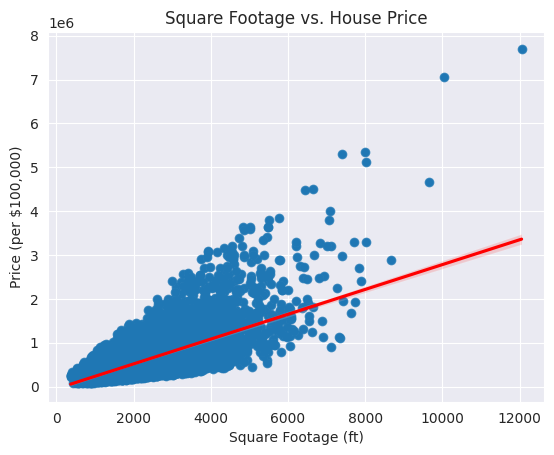

In [482]:

sns.set_style('darkgrid')
sns.scatterplot(x='sqft_living', y='price', data=subset)
sns.regplot(x='sqft_living', y='price', data=subset, line_kws={'color':'red'})

plt.title('Square Footage vs. House Price')
plt.xlabel('Square Footage (ft)')
plt.ylabel('Price (per $100,000)')
#xaxis = np.array([0, 15000])
#yaxis = np.array([0, 1000000])
plt.show()

This is the plot (below)  for Square Footage vs. Home price based on data excluding outliers.

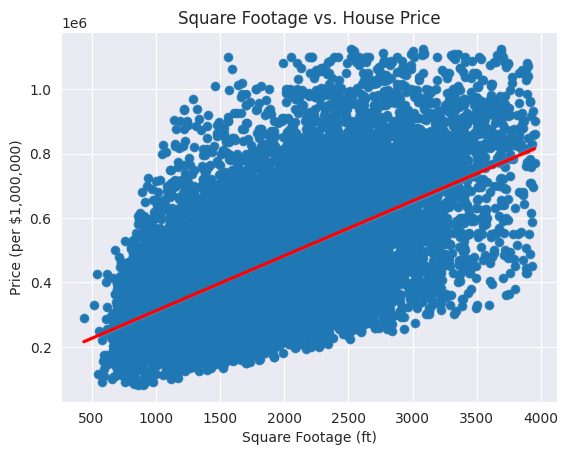

In [442]:
# Plot the regression model for square footage and house price - excluding outliers, not normalized
sns.set_style('darkgrid')
sns.scatterplot(x='sqft_living', y='price', data=rm_outliers_df)
sns.regplot(x='sqft_living', y='price', data=rm_outliers_df, line_kws={'color':'red'})

plt.title('Square Footage vs. House Price')
plt.xlabel('Square Footage (ft)')
plt.ylabel('Price (per $1,000,000)')
#xaxis = np.array([0, 15000])
#yaxis = np.array([0, 1000000])
plt.show()

This is the plot for Square Footage vs. Home price based on data excluding outliers and normalized. 

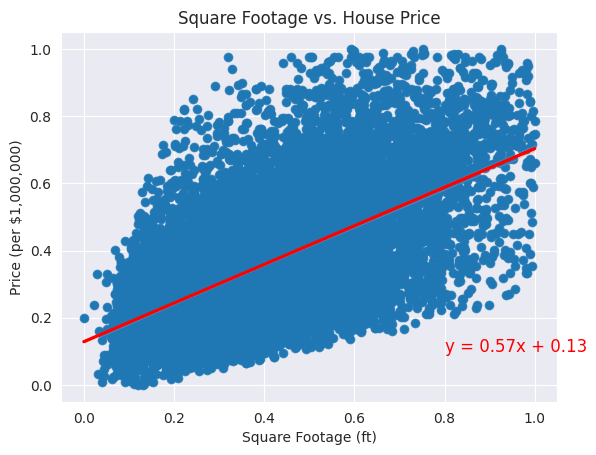

In [441]:
# Plot the regression model for square footage and house price - excluidng outliers, normalized data 
# Load the dataset
df = pd.read_csv('minmaxnorm_exoutliers.csv')

# rename columns
df.columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']


# Define the dependent variable ['price'] (y) and independent variables [bathrooms and sqft_living] (X)
y = df['price']
x = df[['sqft_living']]

sns.set_style('darkgrid')
sns.scatterplot(x='sqft_living', y='price', data=df)
sns.regplot(x='sqft_living', y='price', data=df, line_kws={'color':'red'})

reg = LinearRegression().fit(x, y)
intercept = reg.intercept_
slope = reg.coef_[0]

# add equation for regression line
plt.plot(x, intercept + slope*x, 'r')
plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(.8, .1), fontsize=12, color='red')

plt.title('Square Footage vs. House Price')
plt.xlabel('Square Footage (ft)')
plt.ylabel('Price (per $1,000,000)')
#xaxis = np.array([0, 15000])
#yaxis = np.array([0, 1000000])
plt.show()

Observations determined that there was no difference in the data output between using normalized and non normalized data therefore for the remainder of this project, the original subset data will be used. 

This is the plot for Bathroom vs. Home price based on data including outliers. 

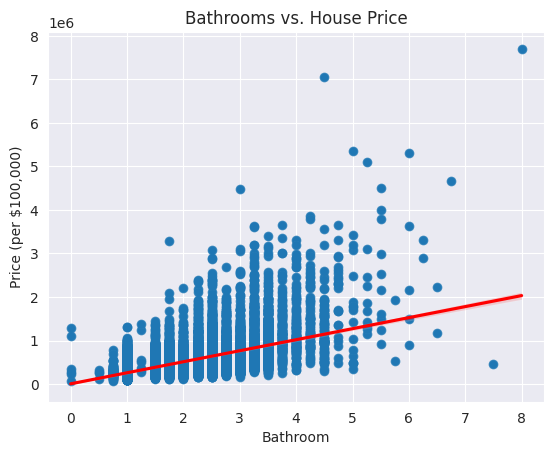

In [445]:
# Plot the regression model for square footage and house price - including outliers, non normalized data 


# Define the dependent variable ['price'] (y) and independent variables [bathrooms and sqft_living] (X)
y = df['price']
x = df[['bathrooms']]


# Plot the regression model for bathrooms and house price
sns.set_style('darkgrid')
sns.scatterplot(x='bathrooms', y='price', data=subset)
sns.regplot(x='bathrooms', y='price', data=subset, line_kws={'color':'red'})

plt.title('Bathrooms vs. House Price')
plt.xlabel('Bathroom')
plt.ylabel('Price (per $100,000)')
plt.yscale('linear')
plt.show()

This is the plot for Bathroom vs. Home price based on data excluding outliers.

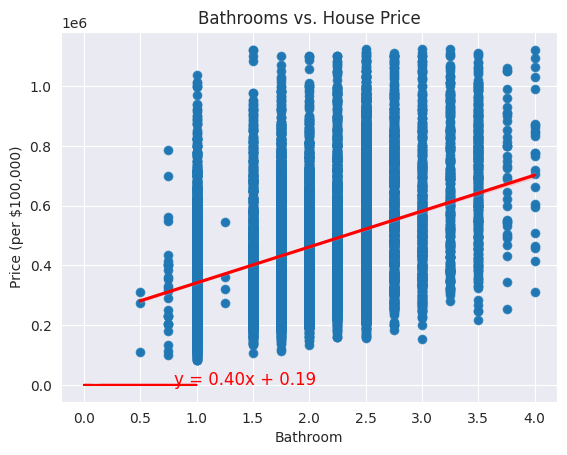

In [444]:
# Define the dependent variable ['price'] (y) and independent variables [bathrooms and sqft_living] (X)
y = df['price']
x = df[['bathrooms']]

sns.set_style('darkgrid')
sns.scatterplot(x='bathrooms', y='price', data=rm_outliers_df)
sns.regplot(x='bathrooms', y='price', data=rm_outliers_df, line_kws={'color':'red'})

reg = LinearRegression().fit(x, y)
intercept = reg.intercept_
slope = reg.coef_[0]

# add equation for regression line
plt.plot(x, intercept + slope*x, 'r')
plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(.8, .1), fontsize=12, color='red')

# Plot the regression model for lot square footage and house price

plt.title('Bathrooms vs. House Price')
plt.xlabel('Bathroom')
plt.ylabel('Price (per $100,000)')
plt.yscale('linear')
plt.show()

Training and testing of the data 

In [446]:
# initialize train and test for both variables
X_train, X_test, y_train, \
y_test = train_test_split(X_bathooms_living, y_price, test_size = 0.25, 
                          random_state = 222)

In [447]:
# Get the size of train and test sizes
train_shape = X_train.shape[0]
test_shape = X_test.shape[0]

# Get the percentage of train and test sizes
train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)
print('Train Size:', round(train_percent * 100, 2), '\nTest Size:', 
      round(test_percent * 100, 2))
     

Train Size: 74.99 
Test Size: 25.01


In [448]:
# Get the OLS regression model results
price_model = sm.add_constant(X_train)

price_model_results = sm.OLS(y_train, X_train).fit()
price_model_results.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     2692.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:39:48   Log-Likelihood:            -1.4399e+05
No. Observations:               10731   AIC:                         2.880e+05
Df Residuals:                   10728   BIC:                         2.880e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.386e+05   5192.711     26.693      0.000    1.28e+05    1.49e+05
bathrooms    2431.0443   3233.134      0.752      0.452   -3906.498    8768.586
sqft_living   169.2785      3.221     52.555      0.000     162.965     175.592
==============================================================================
Omnibus:                      508.827   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.642
Skew:                           0.565   Prob(JB):                    3.03e-127
Kurtosis:                       3.164   Cond. No.                     6.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [449]:
# Get predictions
price_mod = LinearRegression()
price_mod.fit(X_train, y_train)
y_pred = price_mod.predict(X_test)
y_pred

array([[481418.48379811],
       [753740.52540652],
       [583116.05327315],
       ...,
       [493267.97538546],
       [375749.95049454],
       [384799.26786052]])

In [450]:
# Output the model accuracy
accuracy = price_mod.score(X_test, y_test)
print(str(round(accuracy * 100, 2)) + '% accuracy')

33.2% accuracy


In [451]:

# Calculate the mean absolute error
mse = mean_absolute_error(y_test, y_pred)
print('$' + str(round(mse, 2)))
     

$131821.63


# *Appendix:* 

# Part I:

# Saving dataframe as csv files 

In [452]:
# save original salesdata dataframe as CSV file in working directory

salesdata.to_csv('original_df.csv', index=False)

In [453]:
# save subset data frame to CSV file

subset.to_csv('final_df.csv', index=False)

In [454]:
# save the subset_znorm dataframe as a CSV file

subset_znorm.to_csv('subset_znorm.csv', index=False)

# Granularity 

In [455]:
# Check the granularity of the subset data - Determines the need for aggregation. 

print(subset['price'].min(), subset['price'].max())
print(subset['bedrooms'].min(), subset['bedrooms'].max())
print(subset['bathrooms'].min(), subset['bathrooms'].max())
print(subset['sqft_living'].min(), subset['sqft_living'].max())
print(subset['sqft_lot'].min(), subset['sqft_lot'].max())
print(subset['yr_built'].min(), subset['yr_built'].max())
print(subset['zipcode'].min(), subset['zipcode'].max())

75000.0 7700000.0
0.0 33.0
0.0 8.0
370.0 12050.0
520.0 1651359.0
1900 2015
98001 98199


# Skewness + Kurtosis + Correlations

Calculate the skewness of a column based on non-normalized data (subset dataset)
Skewness from Pandas:
The skew() function in Pandas can be used to calculate the skewness of a sample distribution. The function returns a value that indicates the degree of skewness. If the value is positive, the distribution is skewed to the right (i.e., it has a long right tail). If the value is negative, the distribution is skewed to the left (i.e., it has a long left tail). If the value is close to zero, the distribution is approximately symmetric.

In [456]:
df = pd.DataFrame(subset)
skewness = df.skew()
skew_summary = pd.DataFrame({'Skewness': skewness})
print(skew_summary)

              Skewness
price         3.916013
bedrooms      2.245520
bathrooms     0.490866
sqft_living   1.406860
sqft_lot     13.440280
yr_built     -0.455818
zipcode       0.398600


In [457]:
# Calculate correlation matrix for all remaining variables (less id and date)

corr_matrix = droppedID.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308095   0.528322     0.705356  0.088484  0.260248   
bedrooms       0.308095  1.000000   0.514256     0.573338  0.030226  0.179843   
bathrooms      0.528322  0.514256   1.000000     0.755995  0.084713  0.503446   
sqft_living    0.705356  0.573338   0.755995     1.000000  0.165686  0.360198   
sqft_lot       0.088484  0.030226   0.084713     0.165686  1.000000 -0.001168   
floors         0.260248  0.179843   0.503446     0.360198 -0.001168  1.000000   
waterfront     0.283986 -0.001646   0.068368     0.114123  0.023793  0.024203   
view           0.404474  0.082227   0.185297     0.285908  0.069133  0.029629   
condition      0.033073  0.026811  -0.124877    -0.059621 -0.010947 -0.261784   
grade          0.670242  0.356103   0.668163     0.765616  0.108425  0.464855   
sqft_above     0.607853  0.474428   0.687308     0.876517  0.177583  0.531144   
sqft_bas

In [458]:
# Filter the correlation matrix to show only values greater than 0.7
high_corr = corr_matrix[abs(corr_matrix) > 0.7]

# Print the columns with high correlation
print(high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0))

                  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price          1.000000       NaN        NaN     0.705356       NaN     NaN   
bedrooms            NaN       1.0        NaN          NaN       NaN     NaN   
bathrooms           NaN       NaN   1.000000     0.755995       NaN     NaN   
sqft_living    0.705356       NaN   0.755995     1.000000       NaN     NaN   
sqft_lot            NaN       NaN        NaN          NaN  1.000000     NaN   
floors              NaN       NaN        NaN          NaN       NaN     1.0   
waterfront          NaN       NaN        NaN          NaN       NaN     NaN   
view                NaN       NaN        NaN          NaN       NaN     NaN   
condition           NaN       NaN        NaN          NaN       NaN     NaN   
grade               NaN       NaN        NaN     0.765616       NaN     NaN   
sqft_above          NaN       NaN        NaN     0.876517       NaN     NaN   
sqft_basement       NaN       NaN        NaN        

In [459]:
# calculate skewness and kurtosis on minmaxnormalized dataset 

skewness = stats.skew(minmaxnormalized_data)
kurtosis = stats.kurtosis(minmaxnormalized_data)

print('Skewness:', skewness)
print('Kurtosis:', kurtosis)

Skewness: [ 3.91567912  2.24532921  0.49082424  1.40674007 13.43913522 -0.4557788
  0.39856634]
Kurtosis: [ 32.26342185  57.91595134   1.08889853   4.21162362 297.12615005
  -0.67278653  -0.86042756]


## Normalization via Z-score scaling.
The resulting output shows the scaled values for each column.
Z-score scaling was selected for the scaling method as it applies to distributions that are not uniformly distributed. 

In [460]:
# create a Z score StandardScaler object based on Z score 

z_score_scaler = StandardScaler()

# fit and transform the data using the Z score Z scaler

scaled_data = z_score_scaler.fit_transform(subset)
print(scaled_data)

[[-0.86720011 -0.4005291  -1.44919388 ... -0.22443666 -0.53890867
   1.86509295]
 [-0.00988243 -0.4005291   0.17656531 ... -0.18678955 -0.67512711
   0.87444179]
 [-0.98084013 -1.46840467 -1.44919388 ... -0.12156924 -1.28811007
  -0.93863677]
 ...
 [-0.37846394 -1.46840467 -1.77434572 ... -0.32612169  1.3000402
   1.22958088]
 [-0.38416221 -0.4005291   0.50171715 ... -0.3015754   1.12976715
  -0.9573283 ]
 [-0.58757514 -1.46840467 -1.77434572 ... -0.33260116  1.26598559
   1.22958088]]


In [461]:
# assign the scaled data to new dataframe called subset_znorm

subset_znorm = pd.DataFrame(scaled_data)
subset_znorm = pd.DataFrame(scaled_data, columns=subset_znorm.columns)

# print the scaled dataframe
print(subset_znorm)

              0         1         2         3         4         5         6
0     -0.867200 -0.400529 -1.449194 -0.983425 -0.224437 -0.538909  1.865093
1     -0.009882 -0.400529  0.176565  0.529565 -0.186790 -0.675127  0.874442
2     -0.980840 -1.468405 -1.449194 -1.429702 -0.121569 -1.288110 -0.938637
3      0.169121  0.667346  1.152021 -0.134409 -0.239808 -0.198363  1.080049
4     -0.085823 -0.400529 -0.148587 -0.439184 -0.166973  0.550839 -0.078826
...         ...       ...       ...       ...       ...       ...       ...
17613 -0.492649 -0.400529  0.501717 -0.602456 -0.331301  1.300040  0.463228
17614 -0.384162  0.667346  0.501717  0.246560 -0.220582  1.470313  1.266964
17615 -0.378464 -1.468405 -1.774346 -1.157582 -0.326122  1.300040  1.229581
17616 -0.384162 -0.400529  0.501717 -0.526262 -0.301575  1.129767 -0.957328
17617 -0.587575 -1.468405 -1.774346 -1.157582 -0.332601  1.265986  1.229581

[17618 rows x 7 columns]


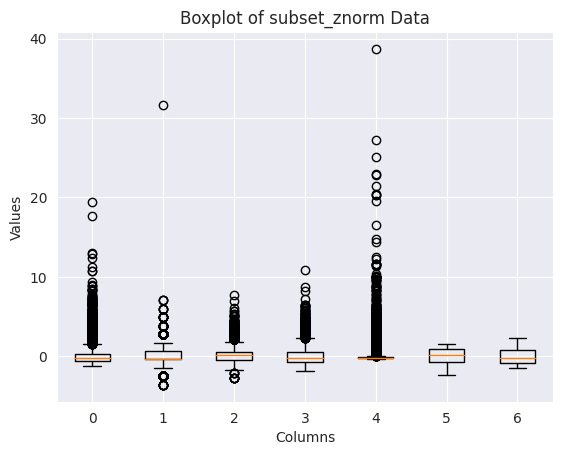

In [462]:
# Create a box plot of based on normalized data (subset_znorm dataset)


fig, ax = plt.subplots()
ax.boxplot(subset_znorm)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')

# set the x-axis tick labels
plt.xticks(range(1, len(subset_znorm.columns) + 1), subset_znorm.columns)

# add a title and axis labels
plt.title('Boxplot of subset_znorm Data')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

In [463]:
# assign the scaled data to new dataframe called subset_znorm

subset_znorm = pd.DataFrame(scaled_data)
subset_znorm = pd.DataFrame(scaled_data, columns=subset_znorm.columns)

# print the scaled dataframe
print(subset_znorm)

              0         1         2         3         4         5         6
0     -0.867200 -0.400529 -1.449194 -0.983425 -0.224437 -0.538909  1.865093
1     -0.009882 -0.400529  0.176565  0.529565 -0.186790 -0.675127  0.874442
2     -0.980840 -1.468405 -1.449194 -1.429702 -0.121569 -1.288110 -0.938637
3      0.169121  0.667346  1.152021 -0.134409 -0.239808 -0.198363  1.080049
4     -0.085823 -0.400529 -0.148587 -0.439184 -0.166973  0.550839 -0.078826
...         ...       ...       ...       ...       ...       ...       ...
17613 -0.492649 -0.400529  0.501717 -0.602456 -0.331301  1.300040  0.463228
17614 -0.384162  0.667346  0.501717  0.246560 -0.220582  1.470313  1.266964
17615 -0.378464 -1.468405 -1.774346 -1.157582 -0.326122  1.300040  1.229581
17616 -0.384162 -0.400529  0.501717 -0.526262 -0.301575  1.129767 -0.957328
17617 -0.587575 -1.468405 -1.774346 -1.157582 -0.332601  1.265986  1.229581

[17618 rows x 7 columns]


# Plots 

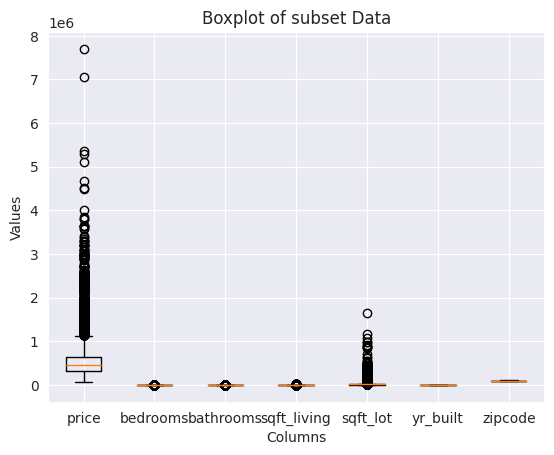

In [464]:
# Create a box plot of based on non-normalized data (subset dataset)


fig, ax = plt.subplots()
ax.boxplot(subset)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')

# set the x-axis tick labels
plt.xticks(range(1, len(subset.columns) + 1), subset.columns)

# add a title and axis labels
plt.title('Boxplot of subset Data')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

In [465]:
import os 
os.getcwd()

'/content'

In [466]:
# convert the numpy array to a pandas dataframe
df = pd.DataFrame(minmaxnorm_exoutliers)

# save the dataframe as a CSV file
df.to_csv('minmaxnorm_exoutliers.csv', index=False)

In [467]:
df = pd.DataFrame(minmaxnorm_exoutliers, columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode'])

# rename columns
df.columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'zipcode'],
      dtype='object')


In [468]:
# Print the file type of the dataset = Pandas Dataframe 
print("File type:", type(salesdata))

File type: <class 'pandas.core.frame.DataFrame'>


# Part II  

A t-test is used to determine if the two groups of data are significally different from each other.

 **Null Hypothesis**: observed differences are not statistically significant. 

 **Alternate Hypothesis**: the observed differences are statistically significant.


**Rationale/Conclusion:** Since the p-value is very small, smaller than alpha, indicates that  the null hypothesis can be rejected in favor of the alternative. Therefore, it can be concluded that the observed differences are statistically significant. 

In [469]:

# Generate two sets of random data
subset1 = np.random.normal(0, 1, size=100)
subset2 = np.random.normal(1, 1, size=100)

# Perform t-test
t, p = ttest_ind(subset1, subset2)

# Print results
print("t-value:", t)
print("p-value:", p)

t-value: -7.412926836364999
p-value: 3.5176520588321637e-12


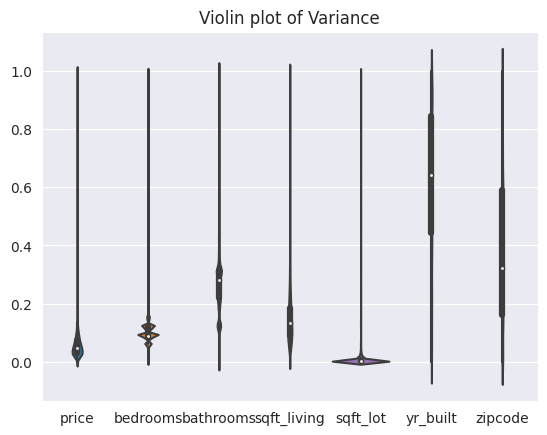

In [470]:
# Create a violin plot with min max normalized data 
sns.violinplot(data=minmaxnormalized_data)

# Add x-axis labels
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode'])

# Add a title
plt.title('Violin plot of Variance')

# Show the plot
plt.show()

# Part III 

In [471]:
# Select independent and dependent variables from subset dataset 
x_subset_living_lot = subset[['sqft_living', 'sqft_lot']]
y_subset_price = subset[['price']]
X_subset_living_lot = sm.add_constant(x_subset_living_lot)

# Create an OLS regression model before removing outliers from subset dataset 
regression_model = sm.OLS(y_subset_price, X_subset_living_lot)
results = regression_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     8750.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:40:04   Log-Likelihood:            -2.4475e+05
No. Observations:               17618   AIC:                         4.895e+05
Df Residuals:                   17615   BIC:                         4.895e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.834e+04   4876.899     -9.913      

Normalized Data - Sqft_lot Sqft_living 

In [472]:
# Load the dataset 
df = pd.read_csv('minmaxnormalized_data.csv')

# Define the dependent variable (y) and independent variables (X)
y = df[['price']]
x = df[['bathrooms', 'sqft_living']]

# Add a constant to the independent variables
X = sm.add_constant(x)

# Create the OLS regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     8723.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:40:04   Log-Likelihood:                -18935.
No. Observations:               17618   AIC:                         3.788e+04
Df Residuals:                   17615   BIC:                         3.790e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.601e-16      0.005      3e-14      

In [473]:
# Select independent and dependent variables (sqft_living and sqft_lot)

# Load the dataset
df = pd.read_csv('minmaxnorm_exoutliers.csv')

# Define the dependent variable ['price'] (y) and independent variables [sqft_living and sqft_lot] (X)
y = df['0']
X = df[['3', '4']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create the OLS regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     3974.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:40:04   Log-Likelihood:                 6540.6
No. Observations:               14309   AIC:                        -1.308e+04
Df Residuals:                   14306   BIC:                        -1.305e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1740      0.004     48.079      0.0

# *Lets see if we can make an accurate model with zipcodes and home prices*

In [474]:
# Select independent and dependent variables
x_subest_zipcode = subset[['zipcode']]
y_subset_price = subset[['price']]
X_subset_zipcode = sm.add_constant(x_subest_zipcode)

In [475]:
# Create an OLS regression model before removing outliers
regression_model = sm.OLS(y_subset_price, X_subset_zipcode)
results = regression_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     48.52
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.38e-12
Time:                        03:40:04   Log-Likelihood:            -2.5080e+05
No. Observations:               17618   AIC:                         5.016e+05
Df Residuals:                   17616   BIC:                         5.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.597e+07   5.09e+06      7.072      0.0

In [476]:
# Select independent and dependent variables
x_zipcode = rm_outliers_df[['zipcode']]
#y_rm_price = rm_outliers_df[['price']]
X_zipcode = sm.add_constant(x_zipcode)

In [477]:
# Create an OLS regression model before removing outliers
regression_model = sm.OLS(y_price, X_zipcode)
results = regression_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.898
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0269
Time:                        03:40:05   Log-Likelihood:            -1.9491e+05
No. Observations:               14309   AIC:                         3.898e+05
Df Residuals:                   14307   BIC:                         3.898e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.25e+06   3.03e+06     -2.061      0.0

In [478]:
unique_zipcodes = rm_outliers_df['zipcode'].nunique()
unique_zipcodes

70

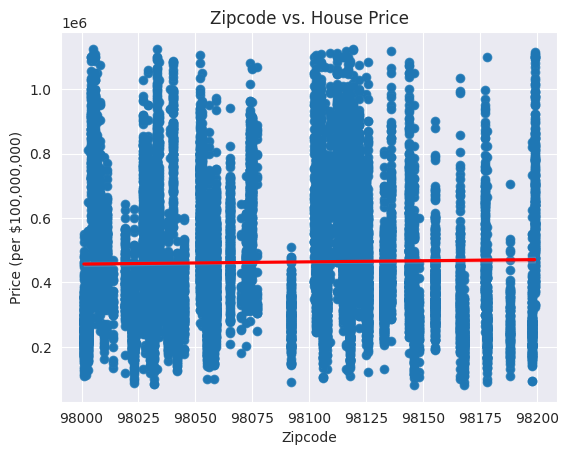

In [479]:
# Plot the regression model for zipcode and house price
sns.set_style('darkgrid')
sns.scatterplot(x='zipcode', y='price', data=rm_outliers_df)
sns.regplot(x='zipcode', y='price', data=rm_outliers_df, line_kws={'color':'red'})
plt.title('Zipcode vs. House Price')
plt.xlabel('Zipcode')
plt.ylabel('Price (per $100,000,000)')
#xaxis = np.array([0, 15000])
#yaxis = np.array([0, 1000000])
plt.show()